In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
path = "sample_data/text.csv"

In [5]:
data = pd.read_csv(path)

In [6]:
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
data.shape

(416809, 3)

In [8]:
data = data.drop("Unnamed: 0",axis = 1)

In [9]:
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
data.describe()

,label
count,416809.000000
mean,1.554271
std,1.490453
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
data.duplicated().sum()

686

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
text = ' '.join(data["text"])

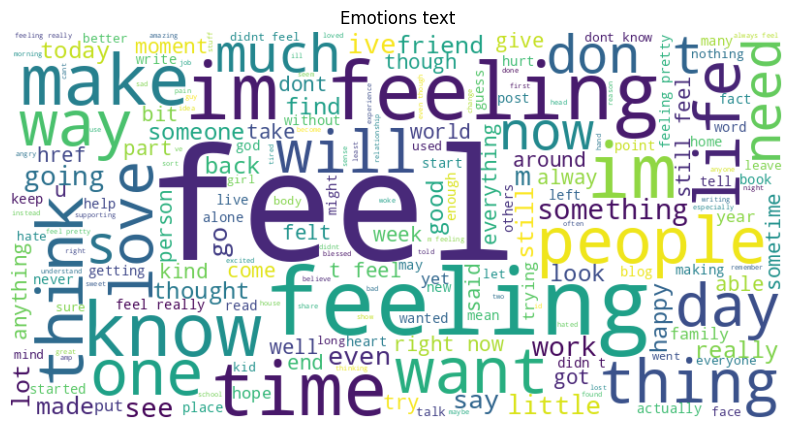

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Emotions text")
plt.show()

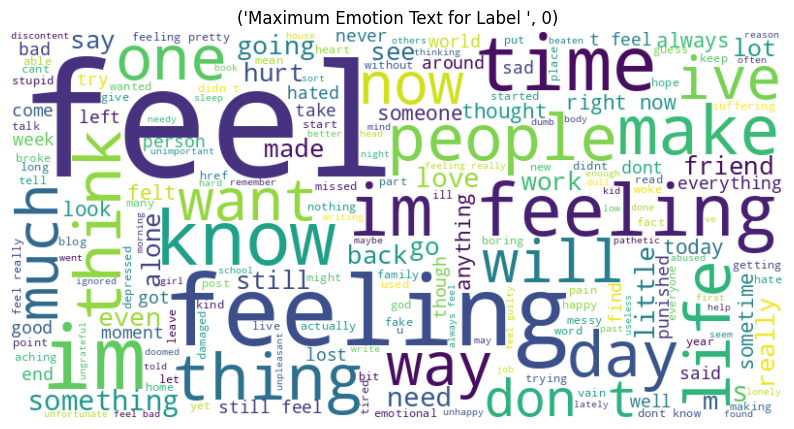

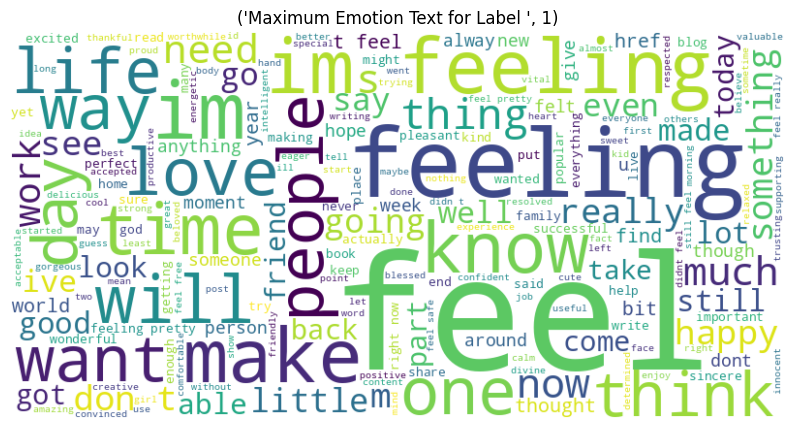

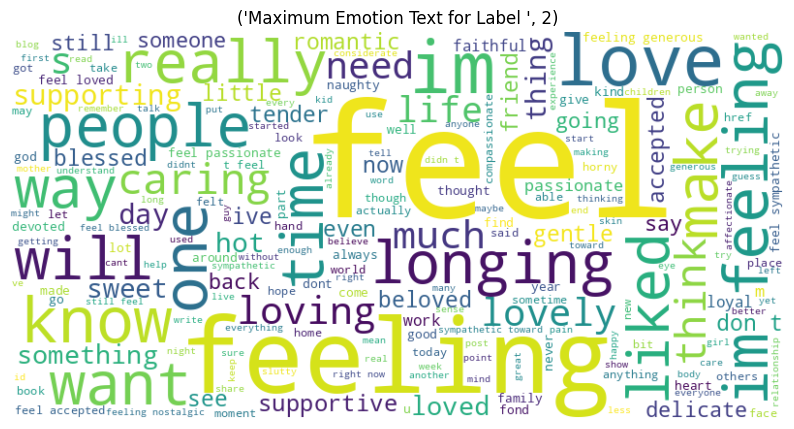

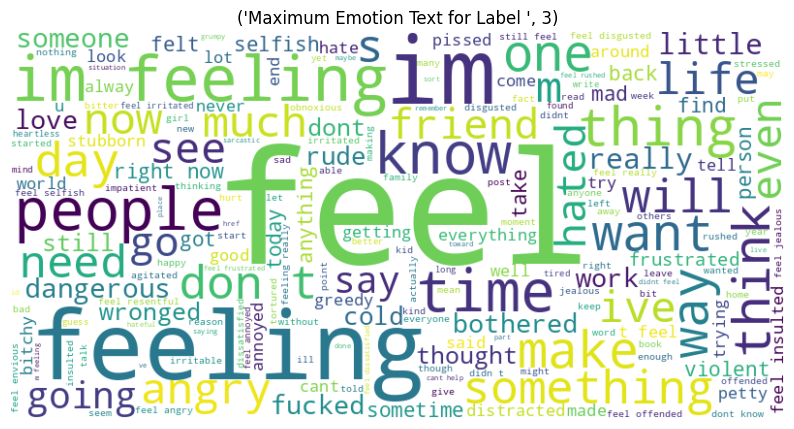

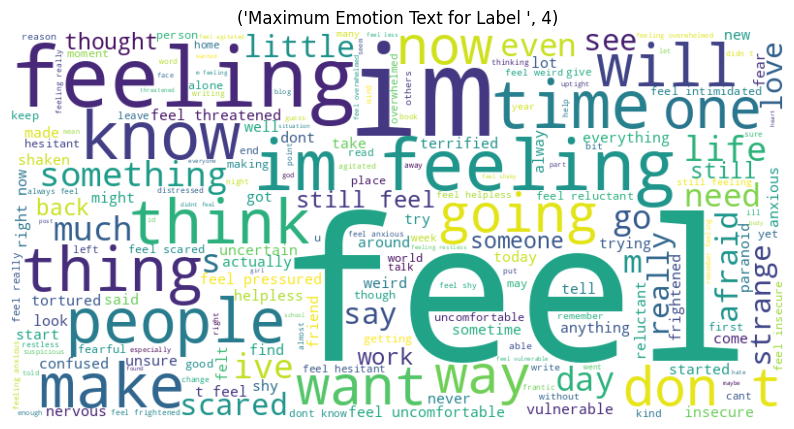

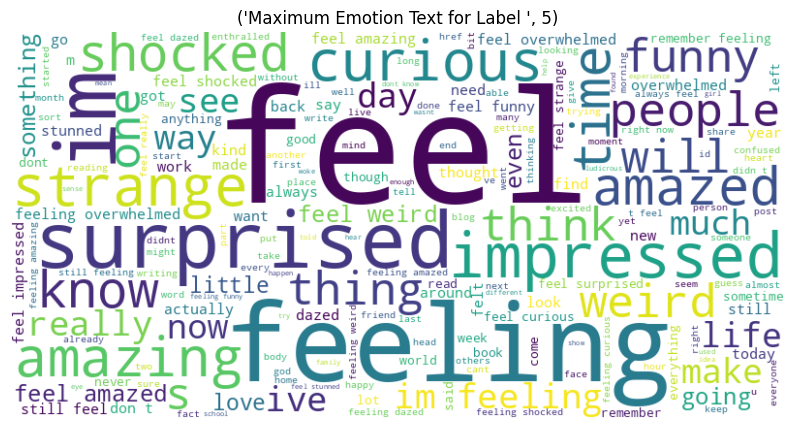

In [18]:
for i in range(0,6):
    datas = data[data["label"] == i]
    text = ' '.join(datas["text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    titel  = "Maximum Emotion Text for Label " , i
    plt.title(titel)
    plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvz = TfidfVectorizer()

In [20]:
x = tvz.fit_transform(data["text"])
y = data['label']

In [21]:
y.value_counts()

label
1    140779
0    120989
3     57235
4     47664
2     34497
5     14959
Name: count, dtype: int64

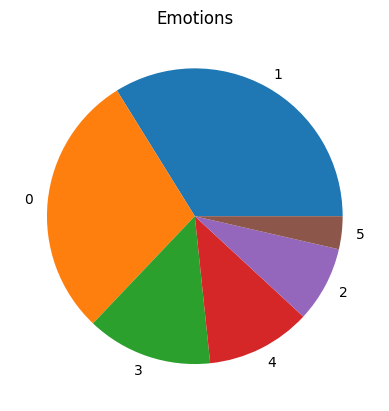

In [22]:
y_counts = y.value_counts()
plt.pie(y_counts, labels=y_counts.index)
plt.title("Emotions")
plt.show()